# Baseline NLP Methods of Document Similarity

The following is a demonstration of document similarity methods which have already been tested as part of the previous POC:
* TF-IDF
    * "Term Frequency - Inverse Document Frequency" : instead of using normal frequencies in a term-document matrix we weigh the term counts by this measure, which gives higher values to lesser occurring words
    * Advantage : Attributes more importance to words which have low frequency
    * Disadvantage : does not take into account word order or semantic information of each word
* LSA
    * "Latent Semantic Analysis" : the idea of reducing dimensions of term-document matrix to create a latent space, which has been proven to be useful in representing term as well as document similarity
    * Advantage: Dimension reduction allows for very fast computation time
    * Disadvantage: performs very poorly by itself
* TF-IDF & LSA 
    * the above methods combined
    * Is a good approximation of document similarity, but there are many more advanced methods which exist
* LDA
    * "Latent Dirichlet Allocation" : uses probabilities of "topics" occurring in a document and the LDA distribution 
    * [this article](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d) discribes it as a soft-clustering, allowing for fuzzy boundaries between documents in a latent space
    * can be used with TF-IDF counts
    * very similar advantages and disadvantages to LSA
* Word2vec (pretrained)
    * using pretrained word embeddings as word representations
    * requires some way of representing whole text (document) as a single vector
    * This can be a very good route with a complex document representation, like doc2vec or skip-thought, or perhaps InferSent, but this demo shows a very simplified version of document representation
    
    
Some extra notation to understand the demo:

- A **term-document matrix** is a matrix whos rows correspond to a term and columns to a document, for example, given the documents "Hello world!", and "Hello!", the corresponding term-document matrix:

|       | Hello | World  |
| ----      |   ----  |       ---- |
| Document 1     | 1         | 1          |
| Document 2    | 1         | 0          |

- **fit_transform** is the method which corresponds to training a model and outputing results

- **cosine similarity** is used as a similarity metric, this is a rather standard measurement of similarity between vectors in NLP applications

# TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import operator
import itertools

# a toy corpora
document1 = 'Sam I am. Long sentence.'
document2 = 'I am Sam'
document3 = 'I love Sam'
document4 = 'Sam loves eggs'
documents = [document1, document2, document3, document4]
tfidf_model = TfidfVectorizer()

X_tfidf = tfidf_model.fit_transform(documents)
vocabulary_tfidf = sorted(tfidf_model.vocabulary_.keys(), key = operator.itemgetter(0))
print('Vocabulary :', vocabulary_tfidf)
# note that the vectorizer does not consider "I" as a token in the vocabulary, due to the built in tokenizer and stop-word list
print('\n\nTerm-document matrix: ')
X_tfidf.todense()

Vocabulary : ['am', 'eggs', 'long', 'love', 'loves', 'sam', 'sentence']


Term-document matrix: 
Out[1]: matrix([[0.46345796, 0. , 0.58783765, 0. , 0. ,
 0.30675807, 0.58783765],
 [0.83388421, 0. , 0. , 0. , 0. ,
 0.55193942, 0. ],
 [0. , 0. , 0. , 0.88654763, 0. ,
 0.46263733, 0. ],
 [0. , 0.66338461, 0. , 0. , 0.66338461,
 0.34618161, 0. ]])

In [7]:
for i, j in list(itertools.combinations(range(0, 4), r=2)):
    print('The sentence - "', documents[i], '" - and sentence - "', documents[j], '" - have a similarity score of :')
    print(round(cosine_similarity(X_tfidf[i], X_tfidf[j])[0][0]*100,2), '%')

The sentence - " Sam I am. Long sentence. " - and sentence - " I am Sam " - have a similarity score of :
55.58 %
The sentence - " Sam I am. Long sentence. " - and sentence - " I love Sam " - have a similarity score of :
14.19 %
The sentence - " Sam I am. Long sentence. " - and sentence - " Sam loves eggs " - have a similarity score of :
10.62 %
The sentence - " I am Sam " - and sentence - " I love Sam " - have a similarity score of :
25.53 %
The sentence - " I am Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
19.11 %
The sentence - " I love Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
16.02 %

# LSA

In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

stop = ['am']

count_vectorizer = CountVectorizer(ngram_range = (1,1), stop_words = stop)
bow = count_vectorizer.fit_transform(documents)
vocabulary_bag_of_words = count_vectorizer.get_feature_names()
print('Vocabulary: ', vocabulary_bag_of_words)
print('\n\nTerm-document matrix: ')
print(bow.todense())

Vocabulary: ['eggs', 'long', 'love', 'loves', 'sam', 'sentence']


Term-document matrix: 
[[0 1 0 0 1 1]
 [0 0 0 0 1 0]
 [0 0 1 0 1 0]
 [1 0 0 1 1 0]]

In [10]:
lsa_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
print('shape of matrix before lsa: ', bow.shape)
X_lsa = lsa_model.fit_transform(bow)
print('shape of matrix after lsa: ', X_lsa.shape)
print('\n\nReduced dimension matrix: ')
print(X_lsa)

shape of matrix before lsa: (4, 6)
shape of matrix after lsa: (4, 2)


Reduced dimension matrix: 
[[ 1.34332067e+00 1.00000000e+00]
 [ 8.46041188e-01 1.21956566e-16]
 [ 1.03820628e+00 7.49993549e-16]
 [ 1.34332067e+00 -1.00000000e+00]]

In [11]:
for i, j in list(itertools.combinations(range(0, 4), r=2)):
    print('The sentence - "', documents[i], '" - and sentence - "', documents[j], '" - have a similarity score of :')
    print(round(cosine_similarity([X_lsa[i]], [X_lsa[j]])[0][0], 2)*100, '%')

The sentence - " Sam I am. Long sentence. " - and sentence - " I am Sam " - have a similarity score of :
80.0 %
The sentence - " Sam I am. Long sentence. " - and sentence - " I love Sam " - have a similarity score of :
80.0 %
The sentence - " Sam I am. Long sentence. " - and sentence - " Sam loves eggs " - have a similarity score of :
28.999999999999996 %
The sentence - " I am Sam " - and sentence - " I love Sam " - have a similarity score of :
100.0 %
The sentence - " I am Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
80.0 %
The sentence - " I love Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
80.0 %

# TF-IDF & LSA

In [13]:
X_tfidf_and_lsa = lsa_model.fit_transform(X_tfidf)
print('Reduced dimension matrix: ')
X_tfidf_and_lsa

Reduced dimension matrix: 
Out[6]: array([[ 0.77258412, -0.44913536],
 [ 0.84472771, -0.23587201],
 [ 0.51728441, 0.47374375],
 [ 0.42843616, 0.70298039]])

In [14]:
for i, j in list(itertools.combinations(range(0, 4), r=2)):
    print('The sentence - "', documents[i], '" - and sentence - "', documents[j], '" - have a similarity score of :')
    print(round(cosine_similarity([X_tfidf_and_lsa[i]], [X_tfidf_and_lsa[j]])[0][0]*100,2),'%')

The sentence - " Sam I am. Long sentence. " - and sentence - " I am Sam " - have a similarity score of :
96.78 %
The sentence - " Sam I am. Long sentence. " - and sentence - " I love Sam " - have a similarity score of :
29.81 %
The sentence - " Sam I am. Long sentence. " - and sentence - " Sam loves eggs " - have a similarity score of :
2.08 %
The sentence - " I am Sam " - and sentence - " I love Sam " - have a similarity score of :
52.87 %
The sentence - " I am Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
27.16 %
The sentence - " I love Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
96.05 %

# LDA

In [16]:
from sklearn.decomposition import LatentDirichletAllocation as LDA_model
lda_model = LDA_model(n_components = 2)
print('shape of matrix before LDA: ', bow.shape)
X_lda = lda_model.fit_transform(bow)
print('shape of matrix after LDA: ', X_lda.shape)
print('\n\nReduced dimension matrix: ')
X_lda

shape of matrix before LDA: (4, 6)
shape of matrix after LDA: (4, 2)


Reduced dimension matrix: 
Out[8]: array([[0.83225662, 0.16774338],
 [0.33284859, 0.66715141],
 [0.18974049, 0.81025951],
 [0.83225871, 0.16774129]])

In [17]:
for i, j in list(itertools.combinations(range(0, 4), r=2)):
    print('The sentence - "', documents[i], '" - and sentence - "', documents[j], '" - have a similarity score of :')
    print(round(cosine_similarity([X_lda[i]], [X_lda[j]])[0][0]*100,2),'%')

The sentence - " Sam I am. Long sentence. " - and sentence - " I am Sam " - have a similarity score of :
61.44 %
The sentence - " Sam I am. Long sentence. " - and sentence - " I love Sam " - have a similarity score of :
41.59 %
The sentence - " Sam I am. Long sentence. " - and sentence - " Sam loves eggs " - have a similarity score of :
100.0 %
The sentence - " I am Sam " - and sentence - " I love Sam " - have a similarity score of :
97.3 %
The sentence - " I am Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
61.44 %
The sentence - " I love Sam " - and sentence - " Sam loves eggs " - have a similarity score of :
41.59 %

# Word2vec (pre-trained)

In [19]:
import numpy as np
# loading a word2vec pretrained model is reading lines and converting to an array
W2V_MODEL = dict()
with open("/dbfs/mnt/nlpdictionary/w2v/model.txt", 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    for l in lines[1:]:
        vals = l.split()
        W2V_MODEL[vals[0]] = np.array([float(val) for val in vals[1:300]])

        
print('example of first 50 values of a word embedding, which can be of length 300:')
W2V_MODEL['cat_NOUN'][:50]        

example of first 50 values of a word embedding, which can be of length 300:
Out[10]: array([ 0.038465, 0.06373 , 0.100525, -0.046849, -0.055794, -0.009474,
 0.025939, 0.048693, -0.048422, 0.072392, 0.02544 , -0.010938,
 0.050554, -0.088319, 0.040283, -0.078394, -0.029317, 0.002892,
 -0.016319, -0.054243, -0.001318, 0.055359, 0.020007, -0.009654,
 0.108029, 0.00361 , 0.005355, -0.07634 , -0.062258, -0.00988 ,
 -0.006369, 0.0134 , 0.036268, 0.021062, 0.045814, 0.003769,
 -0.067068, 0.115643, -0.087204, -0.007275, 0.067547, -0.01851 ,
 -0.005815, -0.006627, 0.025534, -0.012094, 0.044576, -0.027906,
 -0.050143, 0.067182])

In [20]:
# with a lemmatizer/postagger we would get this :
lemma_pos_documents = [
    [('cat', 'NOUN'), ('love', 'VERB'), ('milk', 'NOUN')],
    [('dog', 'NOUN'), ('eat', 'VERB'), ('bone', 'NOUN')],
    [('dog', 'NOUN'), ('love', 'VERB'), ('bone', 'NOUN')],
    [('cat', 'NOUN'), ('hate', 'VERB'), ('egg', 'NOUN')]
]


stoi = list()
for doc in lemma_pos_documents:
    stoi.append({string+'_'+pos:i for i, (string, pos) in enumerate(doc)})
itos = [{v:k for k, v in doc.items()} for doc in stoi]
print('Input of a model may involve indexing the tokens of a sentence (to later retrieve from model) as such: ')
itos

Input of a model may involve indexing the tokens of a sentence (to later retrieve from model) as such: 
Out[11]: [{0: 'cat_NOUN', 1: 'love_VERB', 2: 'milk_NOUN'},
 {0: 'dog_NOUN', 1: 'eat_VERB', 2: 'bone_NOUN'},
 {0: 'dog_NOUN', 1: 'love_VERB', 2: 'bone_NOUN'},
 {0: 'cat_NOUN', 1: 'hate_VERB', 2: 'egg_NOUN'}]

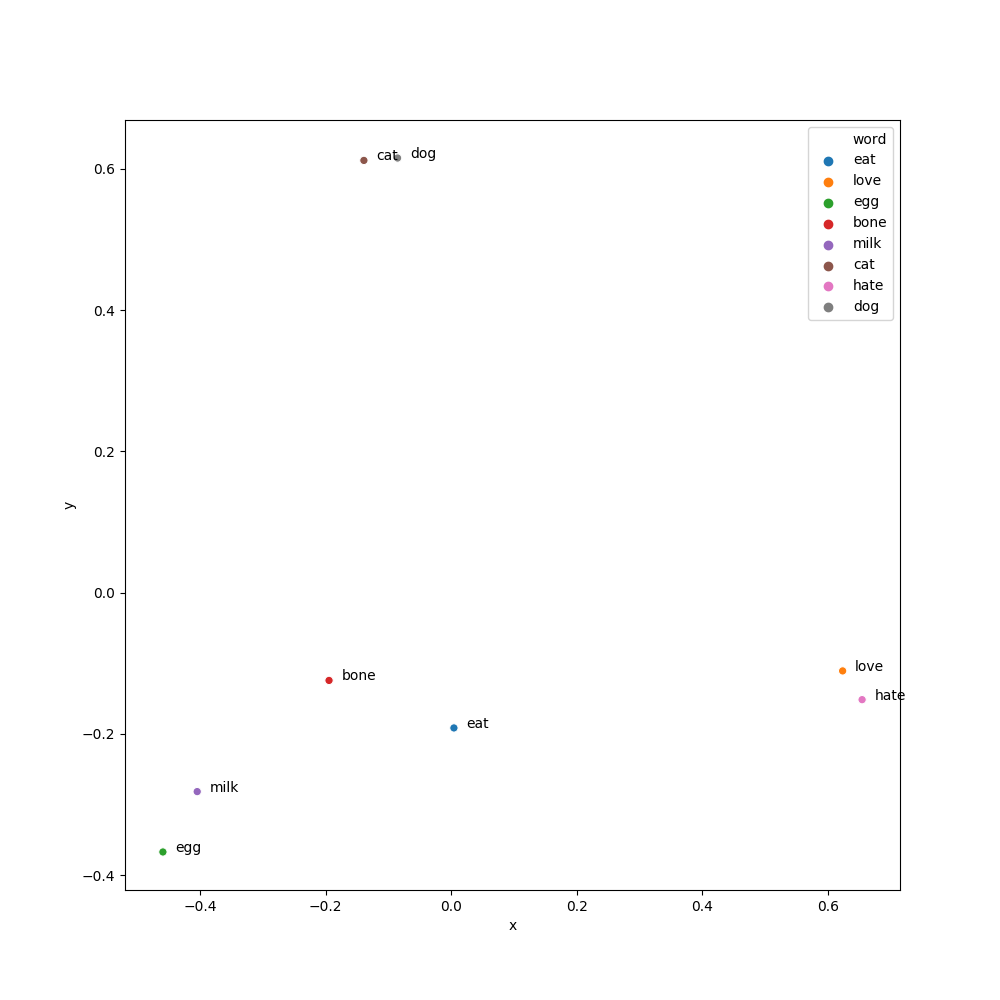

In [21]:
# Purely for visualization purposes, we can plot word embeddings 

from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

vocabulary = {word+'_'+pos for doc in lemma_pos_documents for word, pos in doc}


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
        
def plot_w2v_2d(vocabulary):
    vectors = [W2V_MODEL[word] for word in vocabulary]
    pca = PCA(n_components=2, svd_solver='full')
    reduced_dimension_vectors = pca.fit_transform(vectors)
    df = pd.DataFrame([{'word':word.split('_')[0], 'x':dimensions[0], 'y':dimensions[1]} for word, dimensions in zip(vocabulary, reduced_dimension_vectors)])
    fig = plt.figure(figsize = (10,10))
    ax = sns.scatterplot('x', 'y', hue = 'word', data = df)
    label_point(df.x, df.y, df.word, ax)
    display(ax.figure)
    
print('Here is a visualization of a vector space, which has been reduced to two dimensions using PCA')    
plot_w2v_2d(vocabulary)

The evaluation for the word2vec model involves going from vector representations of words, to a single representation of a document. There are many methods which may acheive this, but [the following adapted algorithm](https://gist.github.com/adsieg/95e8437e00a21a85f22ba7134812ec6a#file-cosinedistance-py) is an (over) simplified way of doing such, pulled [from this really great source](https://medium.com/@adriensieg/text-similarities-da019229c894)

In [23]:
# a very simplified solution to representing a document would be averaging all tokens' embeddings and computing cosine similarity
def cosine_distance_wordembedding_method(s1, s2):
    vector_1 = np.mean([W2V_MODEL[word] for word in s1 if word in W2V_MODEL],axis=0)
    vector_2 = np.mean([W2V_MODEL[word] for word in s2 if word in W2V_MODEL],axis=0)
    return cosine_similarity([vector_1], [vector_2])


for i, j in list(itertools.combinations(range(0, 4), r=2)): 
    print('The sentence - "', ' '.join([x.split('_')[0] for x in stoi[i]]), '" - and sentence - "', ' '.join([x.split('_')[0] for x in stoi[j]]), '" - have a similarity score of :')
    print(round(cosine_distance_wordembedding_method(stoi[i], stoi[j])[0][0], 2)*100, '%')

The sentence - " cat love milk " - and sentence - " dog eat bone " - have a similarity score of :
68.0 %
The sentence - " cat love milk " - and sentence - " dog love bone " - have a similarity score of :
77.0 %
The sentence - " cat love milk " - and sentence - " cat hate egg " - have a similarity score of :
82.0 %
The sentence - " dog eat bone " - and sentence - " dog love bone " - have a similarity score of :
88.0 %
The sentence - " dog eat bone " - and sentence - " cat hate egg " - have a similarity score of :
69.0 %
The sentence - " dog love bone " - and sentence - " cat hate egg " - have a similarity score of :
72.0 %